# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


**Цель исследования** - установить факторы, которые влияют на стоимость недвижмости

**Исходные данные** получены из приложения по поиску недвижимости Яндекс.Недвижимость

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [2]:
do_obrabotky = data.shape
do_obrabotky

(23699, 22)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

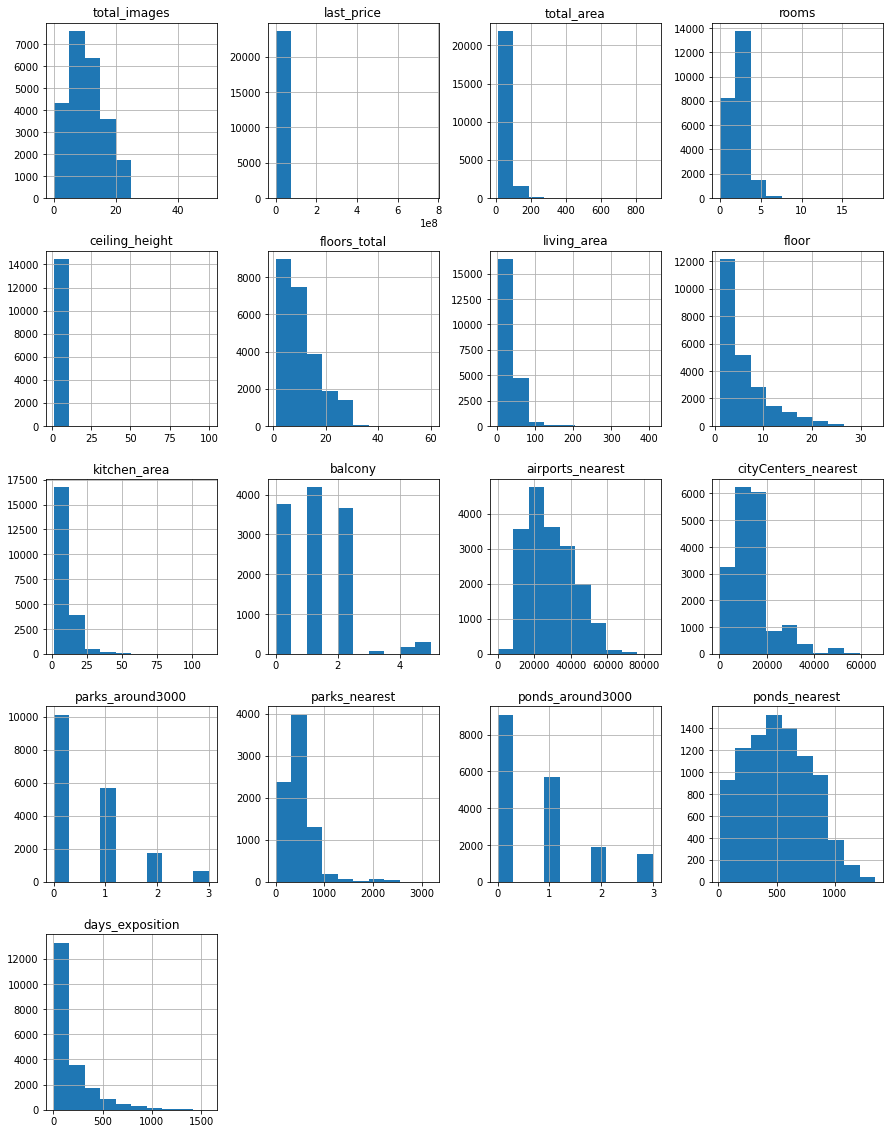

In [5]:
data.hist(figsize=(15, 20))

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Вывод:**

Необходимо поменять тип данных в некоторых столбцах
- is_apartment меняем object на bool
- floors_total, balcony, parks_around3000, ponds_around3000, days_exposition меняем float на int
- first_day_exposition меняем object на datatime

Обнаружены пропуски в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

В столбце last_price максимальная стоимость составляет 763.000.000, выглядит не очень правдаподобно (**нужно проверить**)

В столбце ceiling_height максимальная высота потолка 100 метров, а минимальная 1 метр, что тоже не похоже на правду (**нужно проверить**)

В столбце living_area минимальное значение 2 м2, а в столбце kitchen_area минимальное значение 1.3 м2, что выглядит невозможно (**нужно проверить**)

В столбце days_exposition максимальное время в днях, сколько было опубликовано объявление 1580, что слишком много, минимальное значение 1 день, что может и правда слуиться, но лукчше проверить (**нужно проверить**)

Значение равное 0 в столбце airports_nearest ложь, квартира не может находиться в аэропорту (**нужно удалить**)

### Выполните предобработку данных

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропуски обнаружены в столбцах**

- ceiling_height — высота потолков (м), 
- living_area — жилая площадь в квадратных метрах (м²), 
- is_apartment — апартаменты (булев тип), 
- kitchen_area — площадь кухни в квадратных метрах (м²), 
- balcony — число балконов, 
- locality_name — название населённого пункта, 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м), 
- cityCenters_nearest — расстояние до центра города (м), 
- parks_around3000 — число парков в радиусе 3 км, 
- parks_nearest — расстояние до ближайшего парка (м), 
- ponds_around3000 — число водоёмов в радиусе 3 км, 
- ponds_nearest — расстояние до ближайшего водоёма (м), 
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Проверим датасет на наличие явных дупликатов.

In [8]:
data.duplicated().sum()

0

Таким образом, явные дупликаты отсутствуют.

Теперь перейдём к работе с пропущенными значениями. Заменим пропуски в столбцах *'balcony'* на 0 и изменим тип данных на 'int64' (значения в данном столбце не могут быть дробными, например, в квартире не может быть 1.3 балкона). Скорее всего эти пропуски говорят об отсутствии балконов в квартирах.

В столбце *'is_apartment'* заменим пропущенные значения на False. Также будем считать, что данные о них отсутсвуют так, как эти квартиры не являются аппартаментами. Изменим тип данных на 'bool', потому что в данном столбце значения True и False, а это булевые значения.

In [9]:
data.loc[(data['balcony'].isna()), 'balcony'] = 0
data['balcony'] = data['balcony'].astype('int64')
data.loc[(data['is_apartment'].isna()), 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype('bool')

Заменим пропуски в столбце *'living_area'* на медианный значения по количеству комнат в квартире, в столбцах *'kitchen_area'* и *'ceiling_height'* на медианные значения по всем данным.

In [10]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[data['rooms'] == t, 'living_area'].median()

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Уберём строки с пропущенными значениями в столбце *'floors_total'* так, как их всего 86 и в столбца *'locality_name'* так, как их всего 49, на результат исследования это сильно не повлияет. Также изменим тип данных на 'int' так, как этаж не может быть дробным числом.

In [11]:
data = data[(~data['floors_total'].isna())&(~data['locality_name'].isna())]
data['floors_total'] = data['floors_total'].astype('int64')

Поменяем тип данных в столбце *'first_day_exposition'* на datetime64.

In [12]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Избавимся от неявных дупликатов в столбце *'locality_name'*.

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Чтобы избавиться от неявных дупликатов поменяем букву "ё" на букву "е" и заменим словосочетание "городской поселок" на "поселок городского типа".

In [16]:
data['locality_name'] = data['locality_name'].str.replace("ё", "е")
data['locality_name'] = data['locality_name'].str.replace("городской поселок", "поселок городского типа")

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

Снова проверим данные на наличие явных дупликатов.

In [18]:
data.duplicated().sum()

0

Приступим к обработке редких и аномальных значений.

В столбце last_price максимальная стоимость составляет 763.000.000, выглядит не очень правдаподобно, как и минимальное значение 12.190 (нужно проверить)

В столбце ceiling_height максимальная высота потолка 100 метров, а минимальная 1 метр, что тоже не похоже на правду (нужно проверить)

В столбце living_area минимальное значение 2 м2, а в столбце kitchen_area минимальное значение 1.3 м2, что выглядит невозможно (нужно проверить)

В столбце days_exposition максимальное время в днях, сколько было опубликовано объявление 1580, что слишком много, минимальное значение 1 день, что может и правда случиться, но лучше проверить (нужно проверить)

Значение равное 0 в столбце airports_nearest ложь, квартира не может находиться в аэропорту (нужно удалить)

Отсортируем данные по убыванию и возрастанию для столбца *'last_price'* и вывидем первые 20 cтрок.

In [19]:
data[['last_price']].sort_values(by = 'last_price', ascending = False).head(20)

,last_price
12971,763000000.0
19540,420000000.0
14706,401300000.0
1436,330000000.0
15651,300000000.0
22831,289238400.0
16461,245000000.0
13749,240000000.0
5893,230000000.0
8900,190870000.0


Избавимся от квартир стоимостью выше 100.000.000 в столбце *'last_price'*, потому что это элитные квартиры с большой стоимостью, они могут отрицательно сказать на анализе.

In [20]:
data[['last_price']].sort_values(by = 'last_price').head(10)

,last_price
8793,12190.0
17456,430000.0
14911,430000.0
16274,440000.0
9581,450000.0
17676,450000.0
16219,450000.0
5698,450000.0
18867,470000.0
23484,470000.0


А вот от самого минимального значения стоит избавиться, потому что квартира в Санкт-Петербурге площадью 109 м2 не может стоить так мало.

In [21]:
data = data[(data['last_price'] != data['last_price'].min()) | (data['last_price'] < 100000000)]

Отсортируем данные по убыванию и возрастанию для столбца *'ceiling_height'* и вывидем первые 25 cтрок.

In [22]:
data[['ceiling_height']].sort_values(by = 'ceiling_height', ascending = False).head(25)

,ceiling_height
22869,100.0
3148,32.0
22336,32.0
21377,27.5
5807,27.0
5246,27.0
10773,27.0
17857,27.0
21824,27.0
20478,27.0


Значения от 20 и выше скорее всего были внесены не верно или произошёл какой-то технический сбой, поэтому разделим их на 10, после удалим строки с значениями потолков выше 6.

In [23]:
data[['ceiling_height']].sort_values(by = 'ceiling_height').head(25)

,ceiling_height
22590,1.00
5712,1.20
16934,1.75
20520,2.00
16884,2.00
11352,2.00
22960,2.00
2572,2.00
5850,2.00
19329,2.00


Избавимся от строк, в которых значение столбца *'ceiling_height'* ниже 2,5 метров.

In [24]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x >= 20 else x)
data = data[(data['ceiling_height'] >= 2.4)&(data['ceiling_height'] <= 6)]

Проверим минимальные значения в столбце *'living_area'* и *'kitchen_area'*.

In [25]:
data[['living_area']].sort_values(by = 'living_area').head(10)

,living_area
21758,2.0
13915,2.0
3242,3.0
23574,3.0
17582,5.0
21943,5.4
16431,6.0
19251,6.5
20994,8.0
23208,8.0


In [26]:
data[['kitchen_area']].sort_values(by = 'kitchen_area').head(10)

,kitchen_area
20217,1.3
11033,2.0
19642,2.0
9138,2.0
906,2.0
21419,2.0
6262,2.0
16367,2.0
17834,2.3
8729,2.4


Уберу строки, в которых минимальное значение жилой площади меньше 8 м2, и строки, в которых площадь кухни меньше или равна 2 м2.

In [27]:
data = data[(data['living_area'] >= 2)]
data = data[(data['living_area'] > 8)]

Теперь проверим данные в столбце *'days_exposition'*.

In [28]:
data[['days_exposition']].sort_values(by = 'days_exposition').head(10)

,days_exposition
1632,1.0
16212,2.0
16053,2.0
13061,2.0
16306,3.0
15421,3.0
22269,3.0
16260,3.0
10212,3.0
22887,3.0


In [29]:
data[['days_exposition']].sort_values(by = 'days_exposition', ascending = False).head(160)

,days_exposition
18843,1580.0
1109,1572.0
9553,1553.0
1885,1513.0
20969,1512.0
...,...
1479,1106.0
11452,1105.0
17488,1104.0
18371,1103.0


Удалим строки, в которых время публикации объявления превышает 3 года, потому что значения выше 3 лет имеют большие промежутки между друг другом. Но не будем трогать объявление с 1 днём продажи, это единичный случай и возможно кто-то правда продал картиру за 1 день.

In [30]:
data = data[data['days_exposition'] <= 365*3]

Удалим данные из столбца *'airports_nearest'* равные 0.

In [31]:
data = data[data['airports_nearest'] != 0]

In [32]:
#присвоим новые индексы данным и удалим старые
data.reset_index(inplace=True, drop=True)

**Вывод**

Какие операции были проведены с данными в рамках предобработки
- избавление от пропусков, где это возможно
- изменение типа данных при необходимости
- устранение строк с аномальными и выбивающимися данными
- устранение неявных дупликатов
- также были восстановлены индексы

В результате был получен готовый датасет для анализа.

In [33]:
posl_obrabotky = data.shape
#рассчитаем процент оставшихся данных
posl_obrabotky[0]/do_obrabotky[0]*100

85.21034642811934

Таким образом, у нас осталось 85% от изначальных данных, получилось чуть меньше 90%

### Добавьте в таблицу новые столбцы

Добавим новые столбцы в датасет
- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [34]:
#цена одного квадратного метра
data['price_per_square_meter'] = data['last_price']/data['total_area']
#день публикации объявления (0 - понедельник, 1 - вторник и т. д.)
data['publication_day'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month
#год публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year
#тип этажа квартиры (значения — «первый», «последний», «другой»)
data['floor_type'] = data.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total)
    else 'другой'), axis=1
)
#расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [35]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,publication_day,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,18.603
1,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,13.933
2,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,6.800
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.098
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
5,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.143
6,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
7,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.008
8,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,13.878
9,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,другой,51.677


### Проведите исследовательский анализ данных

Изучение и описание параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,20194.0,9.647816e+00,5.656072e+00,0.000000,6.000000e+00,9.000000e+00,14.000,5.000000e+01
last_price,20194.0,6.240605e+06,1.091177e+07,12190.000000,3.400000e+06,4.500000e+06,6500000.000,7.630000e+08
total_area,20194.0,5.867126e+01,3.392354e+01,12.000000,3.950000e+01,5.060000e+01,67.475,9.000000e+02
rooms,20194.0,2.020254e+00,1.049196e+00,0.000000,1.000000e+00,2.000000e+00,3.000,1.900000e+01
ceiling_height,20194.0,2.690559e+00,2.095331e-01,2.400000,2.600000e+00,2.650000e+00,2.700,6.000000e+00
floors_total,20194.0,1.086763e+01,6.649815e+00,1.000000,5.000000e+00,9.000000e+00,16.000,6.000000e+01
living_area,20194.0,3.334794e+01,2.088418e+01,8.400000,1.800000e+01,3.000000e+01,41.900,4.097000e+02
floor,20194.0,5.976676e+00,4.930739e+00,1.000000,2.000000e+00,4.000000e+00,8.000,3.300000e+01
kitchen_area,20194.0,1.027676e+01,5.379080e+00,2.000000,7.300000e+00,9.100000e+00,11.200,1.120000e+02
balcony,20194.0,5.952758e-01,9.505995e-01,0.000000,0.000000e+00,0.000000e+00,1.000,5.000000e+00


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

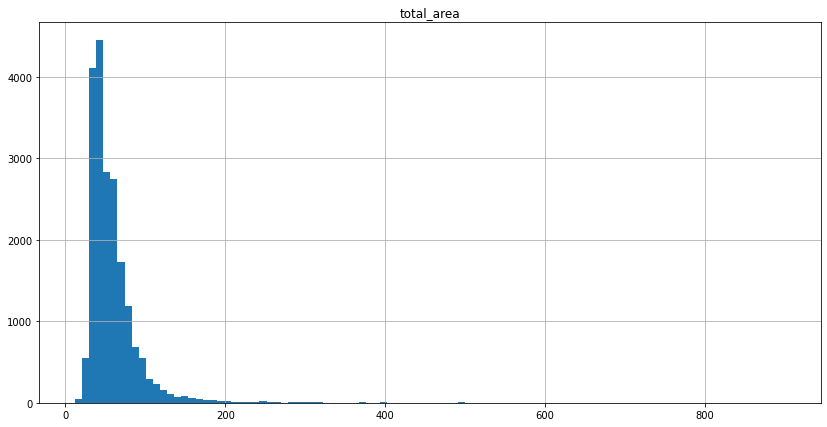

In [37]:
data.hist('total_area', bins = 100, figsize=(14, 7))

<AxesSubplot:>

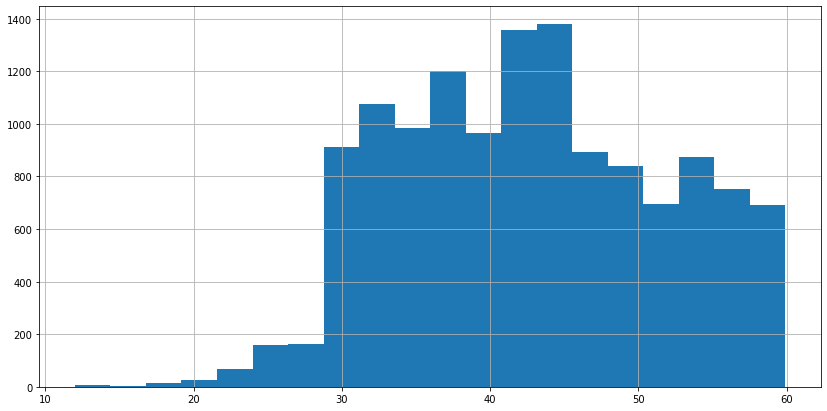

In [38]:
data.loc[data['total_area'] < 60, 'total_area'].hist(bins = 20, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

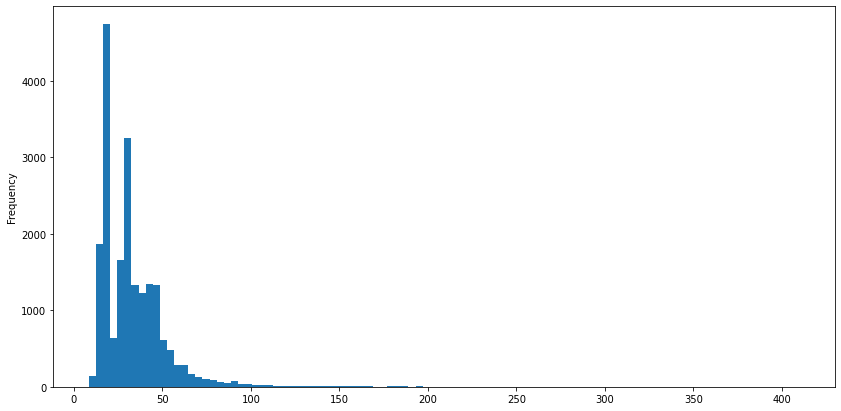

In [39]:
data['living_area'].plot(kind='hist', bins=100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

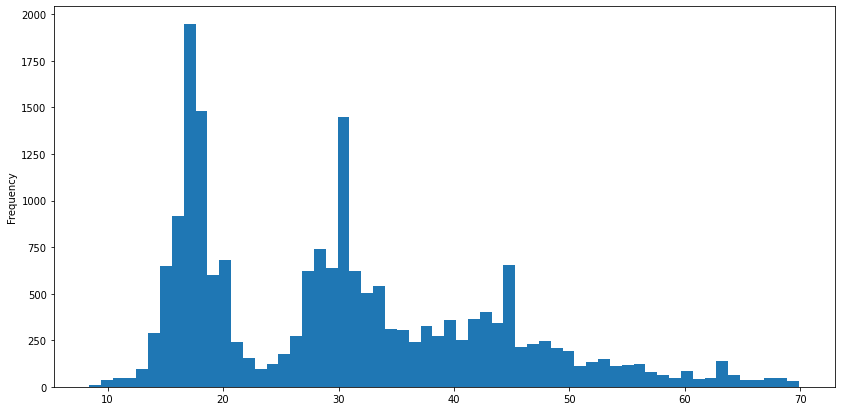

In [40]:
data.loc[data['living_area'] < 70, 'living_area'].plot(kind='hist', bins=60, figsize=(14, 7))

<AxesSubplot:xlabel='rooms'>

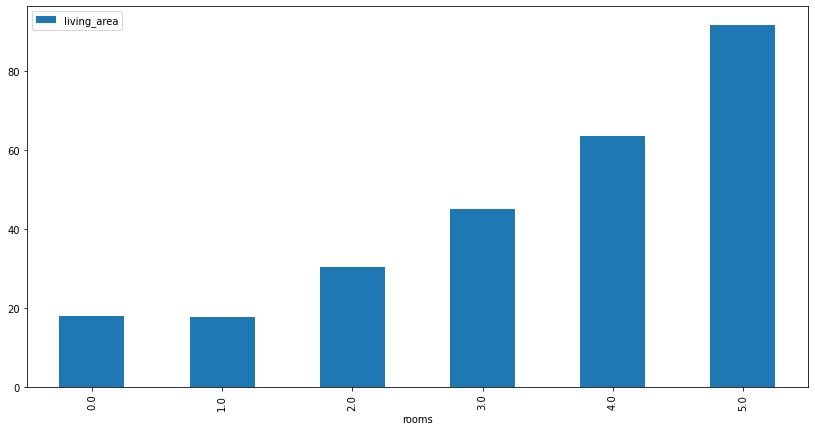

In [41]:
data.pivot_table(index = data.loc[data['rooms'] < 6, 'rooms'], values = 'living_area', aggfunc = 'median').plot(kind='bar', figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

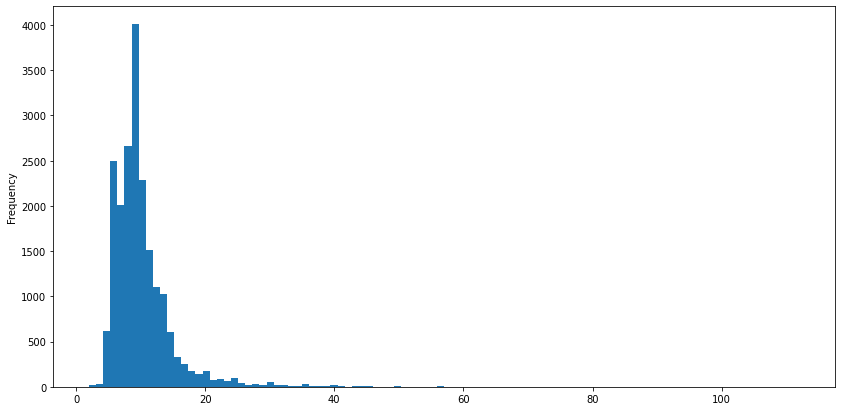

In [42]:
data['kitchen_area'].plot(kind='hist', bins=100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

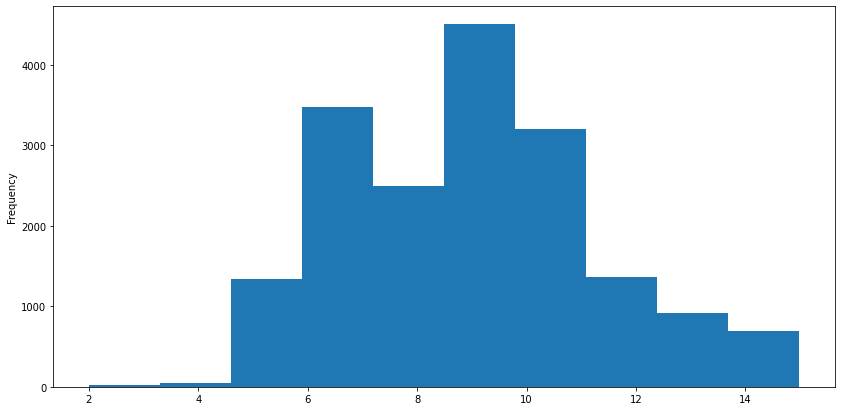

In [43]:
data.loc[data['kitchen_area'] < 15, 'kitchen_area'].plot(kind='hist', bins=10, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

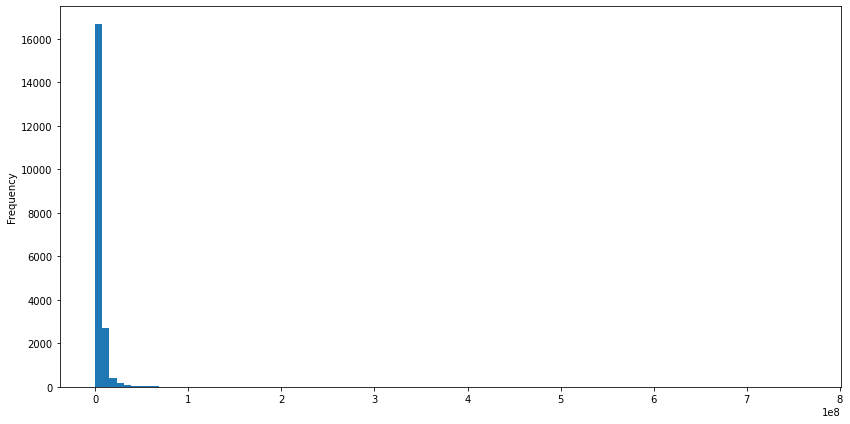

In [44]:
data['last_price'].plot(kind='hist', bins=100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

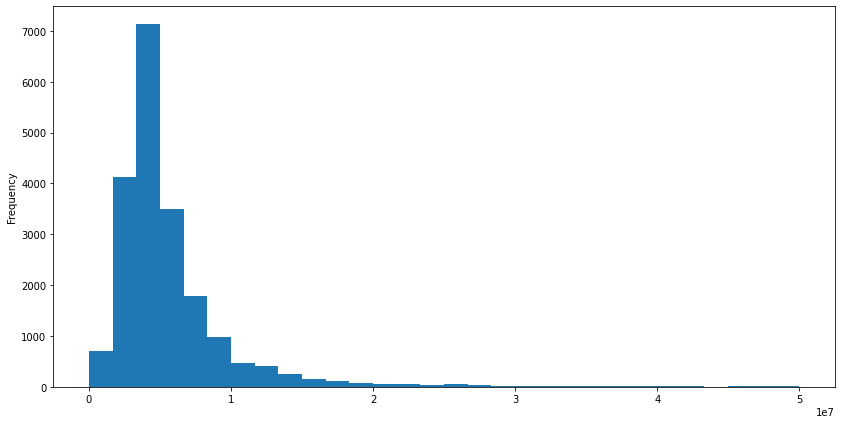

In [45]:
data.loc[data['last_price'] < 50000000, 'last_price'].plot(kind='hist', bins=30, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

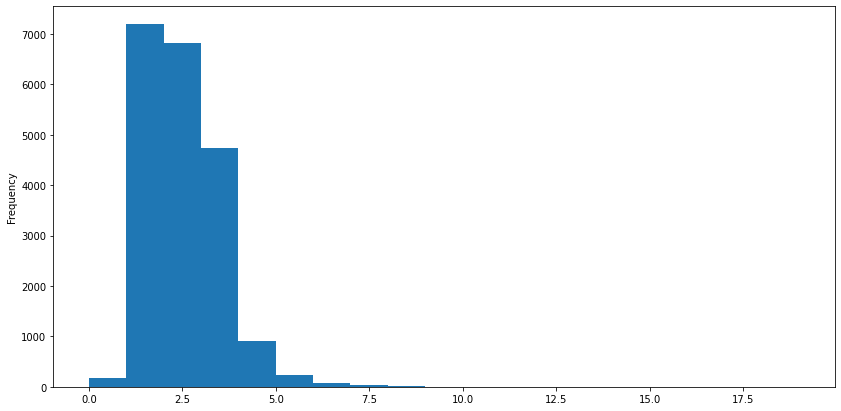

In [46]:
data['rooms'].plot(kind='hist', bins = data['rooms'].max(), figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

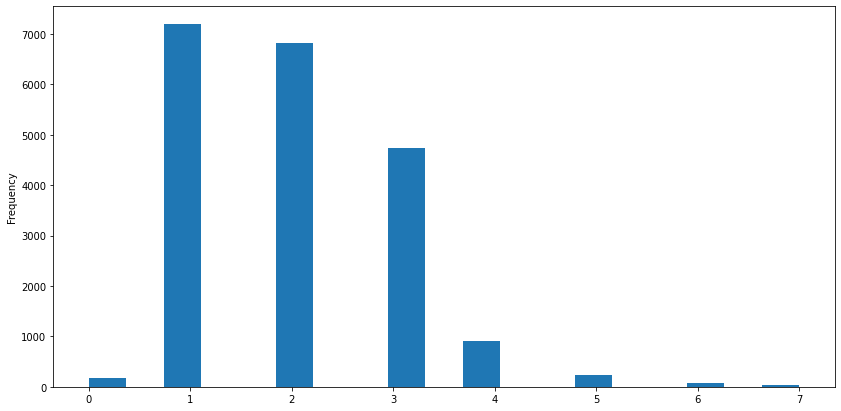

In [47]:
data.loc[data['rooms'] <= 7, 'rooms'].plot(kind='hist', bins = data['rooms'].max(), figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

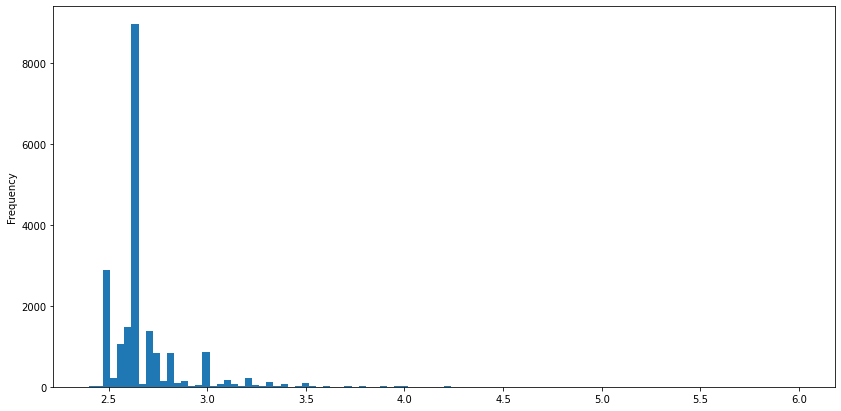

In [48]:
data['ceiling_height'].plot(kind='hist', bins = 100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

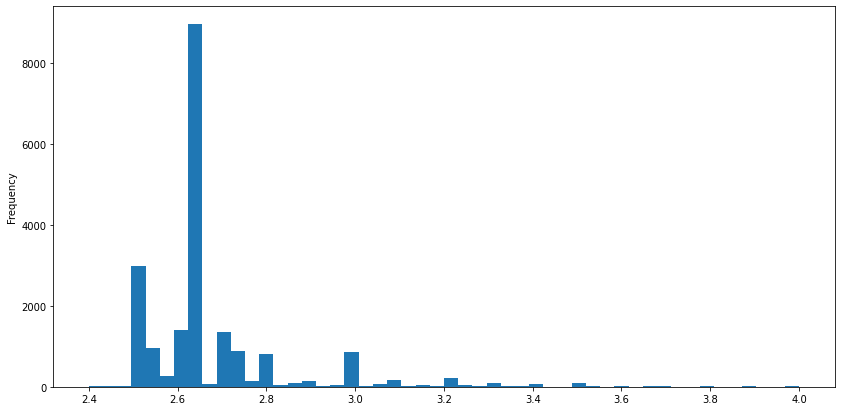

In [49]:
data.loc[data['ceiling_height'] <= 4, 'ceiling_height'].plot(kind='hist', bins = 50, figsize=(14, 7))

<AxesSubplot:xlabel='floor_type'>

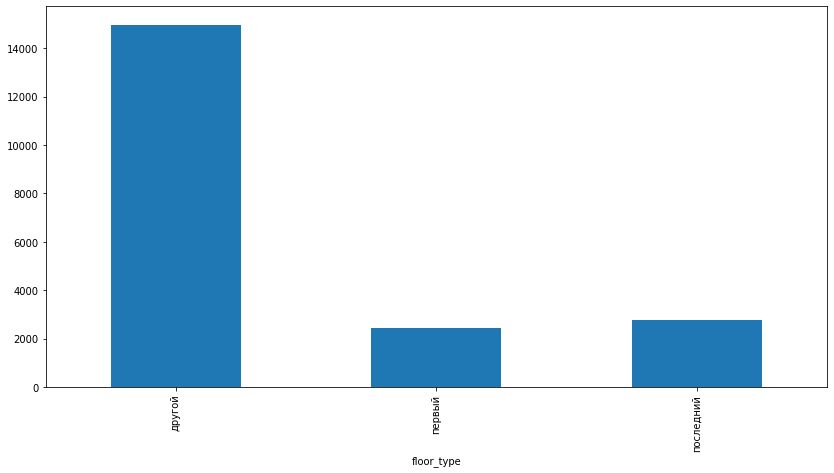

In [50]:
data.groupby('floor_type')['floor_type'].count().plot(kind='bar', figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

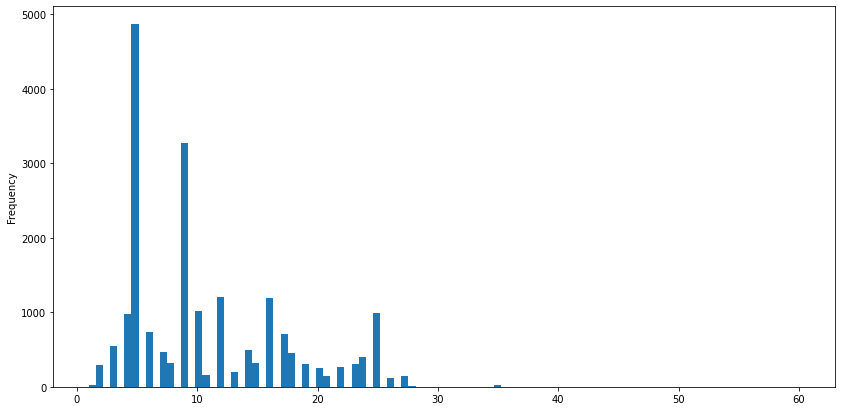

In [51]:
data['floors_total'].plot(kind='hist', bins = 100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

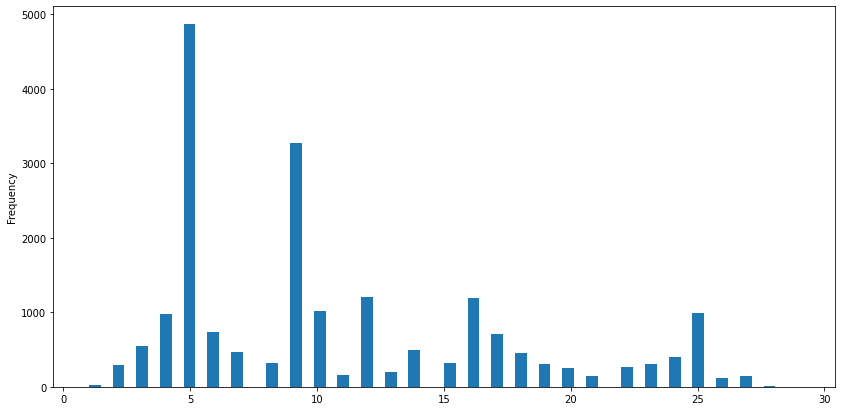

In [52]:
data.loc[data['floors_total'] <= 30, 'floors_total'].plot(kind='hist', bins = 60, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

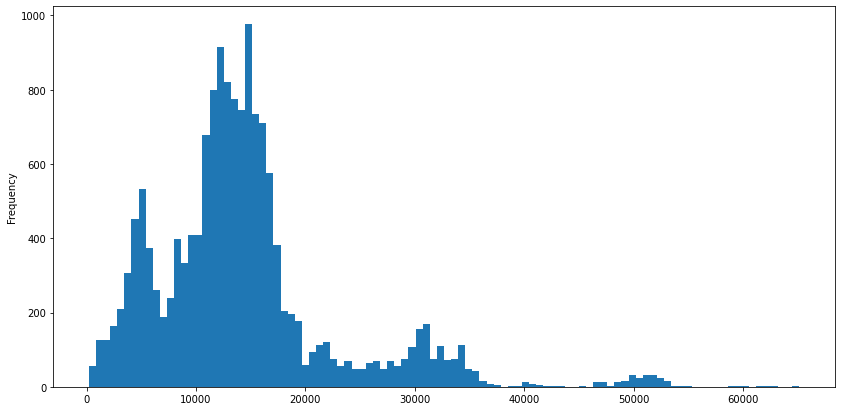

In [53]:
data['cityCenters_nearest'].plot(kind='hist', bins = 100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

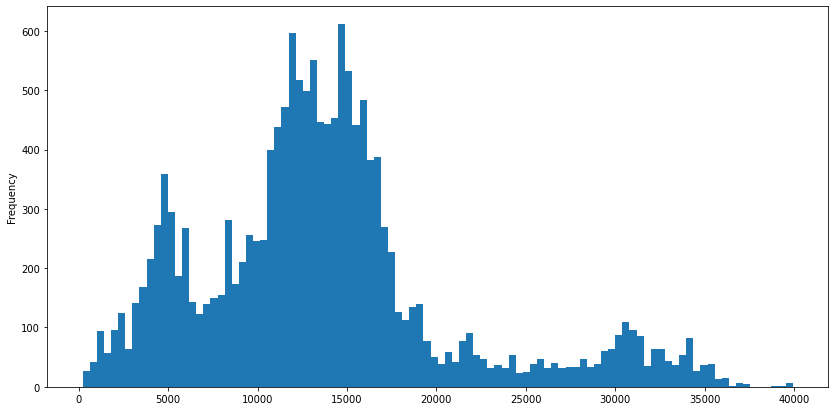

In [54]:
data.loc[data['cityCenters_nearest'] <= 40000, 'cityCenters_nearest'].plot(kind='hist', bins = 100, figsize=(14, 7))

<AxesSubplot:xlabel='locality_name'>

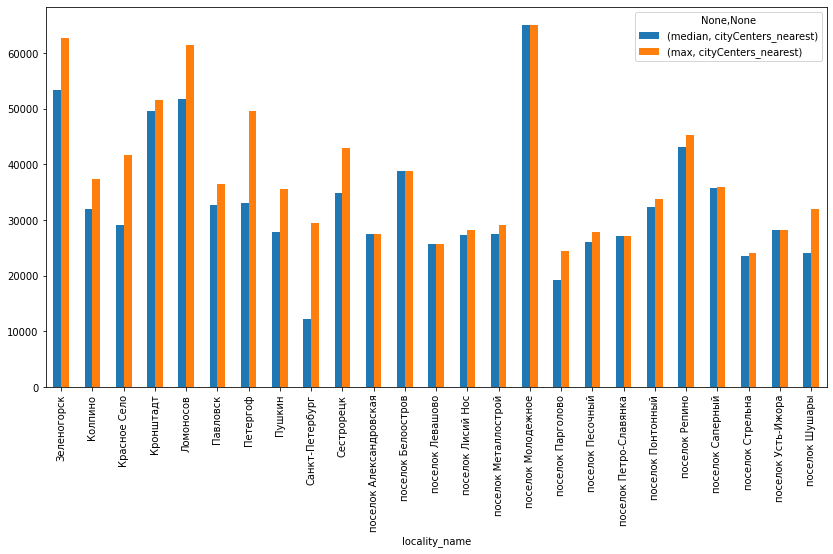

In [55]:
data.pivot_table(index = 'locality_name', values = 'cityCenters_nearest', aggfunc = ['median', 'max']).plot(kind='bar', figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

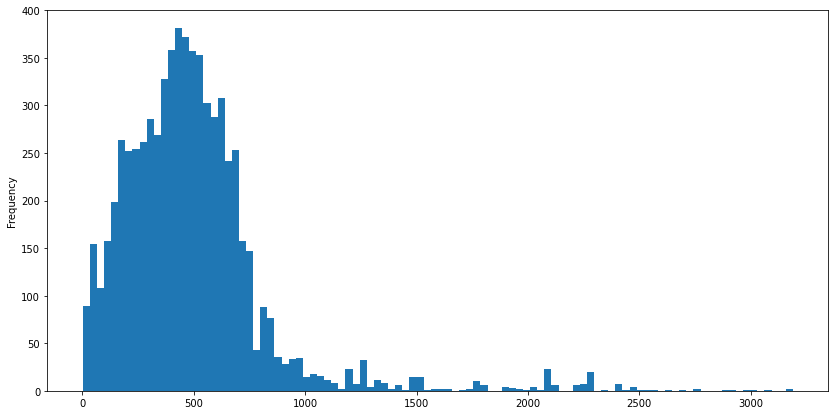

In [56]:
data['parks_nearest'].plot(kind='hist', bins = 100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

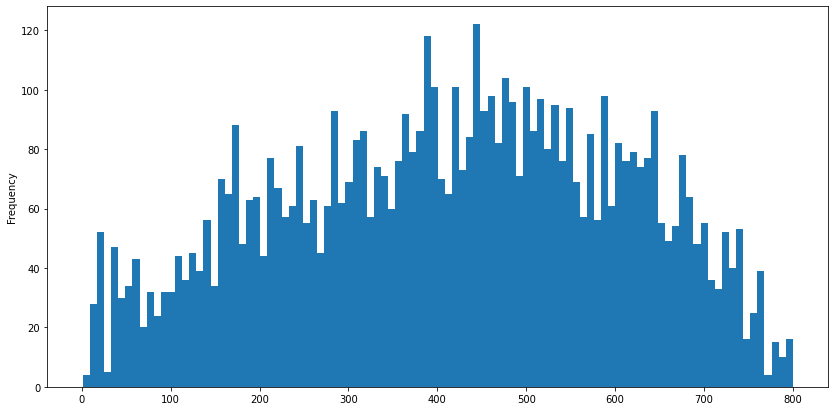

In [57]:
data.loc[data['parks_nearest'] <= 800, 'parks_nearest'].plot(kind='hist', bins = 100, figsize=(14, 7))

- больше всего квартир с общей площадью 45 м2, около 4.500, до 200 м2 количество квартир уменьшается, а после почти отсутствуют
- на гистограмме с жилой площадью мы наблюдаем 3 основных пика: на уровне 18-19 м2, на уровне 30 м2 и 40 м2(сделав дополнительный график с медианными значениями жилой площади по количеству комнат в квартире можно убедиться, что 18-19 м2 соответствует студии или 1-комнатной квартире, 30 м2 2-комнатной квартире и 43 м2 3-комнатной); где-то на уровне 100 м2 и далеее квартиры почти отсуствуют
- на гистограмме с площадью кухни пик наблюдаем в районе 9-10 м2, на уровне 35 м2 количество квартир почти исчезает
- больше всего продают квартиры стоимостью 4-5 миллионов судя по диаграмме стоимости
- больше всего продают 1, 2 и 3 комнатные квартиры, 1 и 2 комнатных почти одинаковое количество, а 3 комнтаных в 2 раза меньше
- почти 9.000 квартир имеют потолок 2.7 м, на вотором месте квартиры с потолком 2.5 м, их около 3.000
- тип этажа в квартире 'первый' и 'последний' почти равны между собой, а количество квартир в категории 'другие' в 7 раз больше. Квартир, продающихся на первом этаже, чуть меньше, чем на последнем, возможно в некоторых домах на первом этаже находятся магазины, парикмахерские и тд.
- больше всего домов с 5 этажами, около 5.000, на втором месте дома с 9 этажами, около 3.500, и почти одинаковое количество домов с 12, 16 и 25 этажами, около 1.200. Это 5 основыных пиков в гистограмме.
- рассмотрим гистограмму удалённости квартиры от центра города, первый пик мы наблюдаем на расстоянии 5.000, далее идёт 12.000 и 16.000 это самые заметные пики, и ещё есть небольшой пик на уровне 30.000 метров от центра города. Также по диаграмме с удалённость квартиры от центра в зависимости от населённого пукта, можно сказать, что больше всего квартиры продают на окраинах города (делаем такие выводы при сравнении медианы и максимального значения), исключением является город Санкт-Петербург, в нём больше всего проданных квартир находится посередине между центром и окрианой
- по гистограмме удалённости ближайшего парка от квартиры можно сказать, что пик приходится на 450 - 500 метров

Проанализируем, как быстро продавались квартиры (столбец days_exposition)

<AxesSubplot:ylabel='Frequency'>

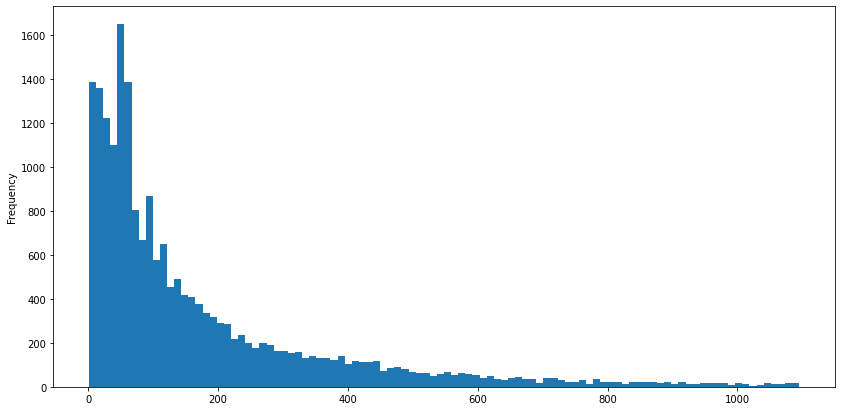

In [58]:
data['days_exposition'].plot(kind='hist', bins = 100, figsize=(14, 7))

<AxesSubplot:ylabel='Frequency'>

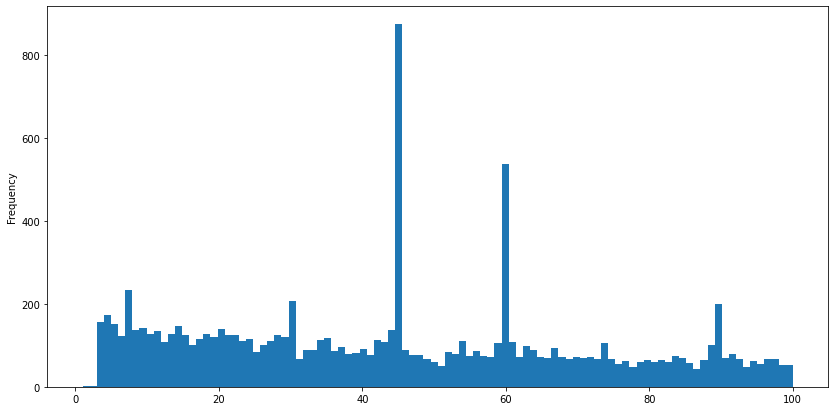

In [59]:
data.loc[data['days_exposition'] <= 100, 'days_exposition'].plot(kind='hist', bins = 100, figsize=(14, 7))

(1.0, 800.0)

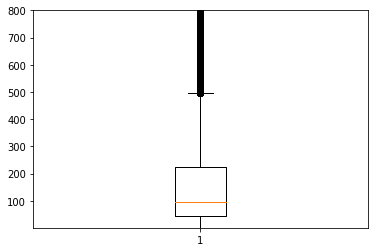

In [60]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,800)

In [61]:
print('Медиана "days_exposition":',data['days_exposition'].median())
print('Среднее "days_exposition":',data['days_exposition'].mean())

Медиана "days_exposition": 94.0
Среднее "days_exposition": 172.15217391304347


In [62]:
data['days_exposition'].describe()

count    20194.000000
mean       172.152174
std        198.225577
min          1.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1095.000000
Name: days_exposition, dtype: float64

Квартиры, которые продают в течении 43 дней (первый квартиль) являются быстрыми, а квартиры, которые продаются после 226 дня (3 квартиль) являются долгими.

Также медианное значение отличается от среднего почти в два раза. Медианное значение равно 94, это середина в данных. Количество значений до медианы и после медианы одинаковое, но при этом есть очень большие значения после медианы и их много, из-за чего и смещается среднее.

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта
 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - количество комнат;
 - тип этажа, на котором расположена квартира (первый, последний, другой);
 - дата размещения (день недели, месяц, год).

0.6432212214667812

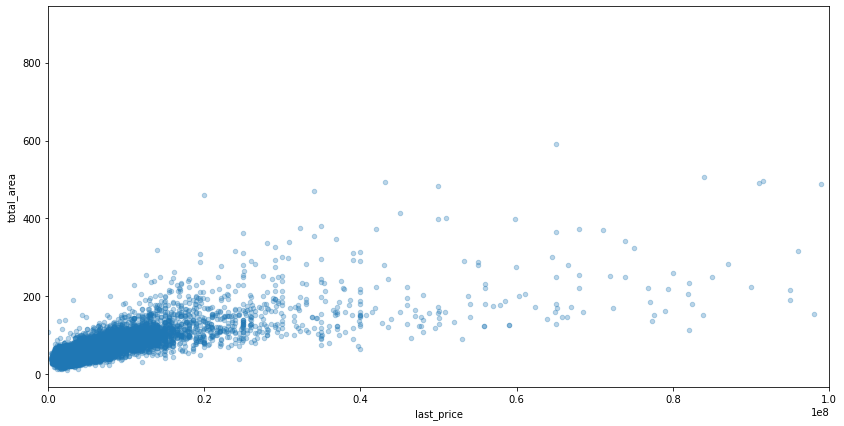

In [63]:
data.plot(x = 'last_price', y='total_area', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.xlim(0, 100000000)
data['last_price'].corr(data['total_area'])

0.5462743411928113

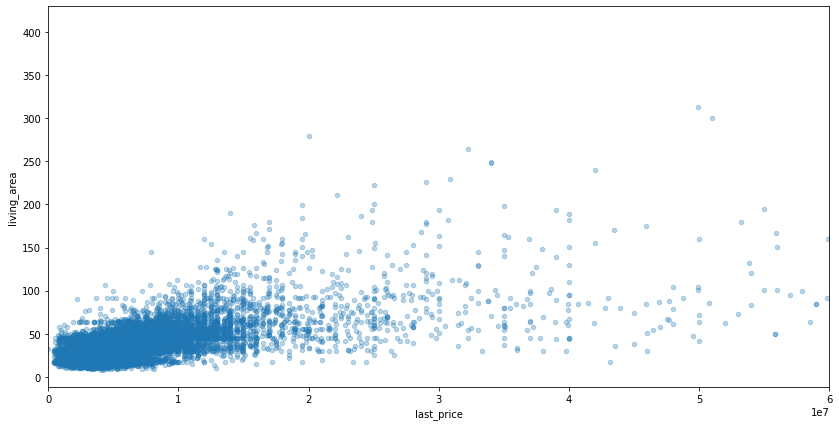

In [64]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.xlim(0, 60000000)
data['last_price'].corr(data['living_area'])

0.42276399316057256

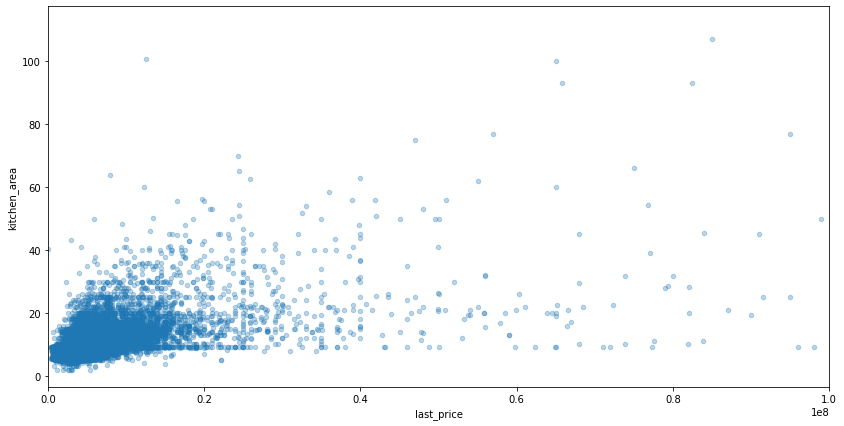

In [65]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.xlim(0, 100000000)
data['last_price'].corr(data['kitchen_area'])

(0.0, 100000000.0)

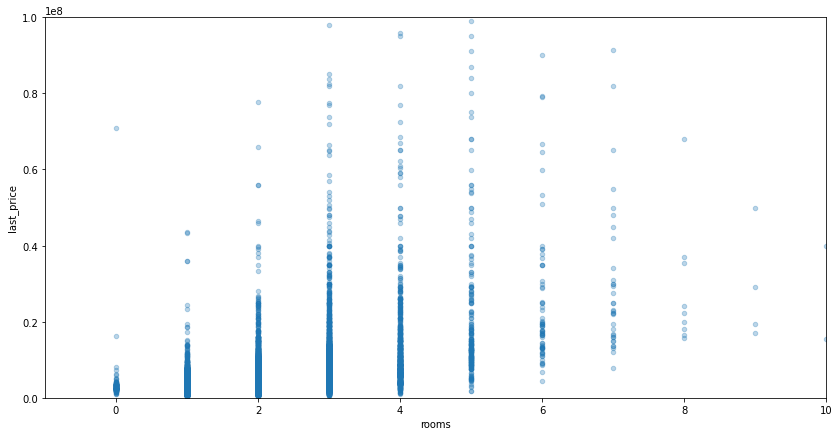

In [66]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.xlim(-1, 10)
plt.ylim(0, 100000000)

<AxesSubplot:xlabel='rooms'>

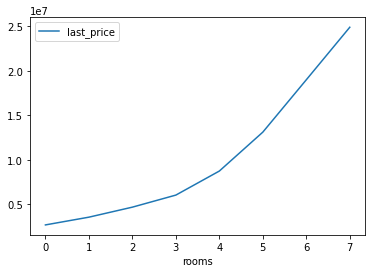

In [67]:
data1 = data.loc[data['rooms'] <= 7]
data1.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot()

(0.0, 100000000.0)

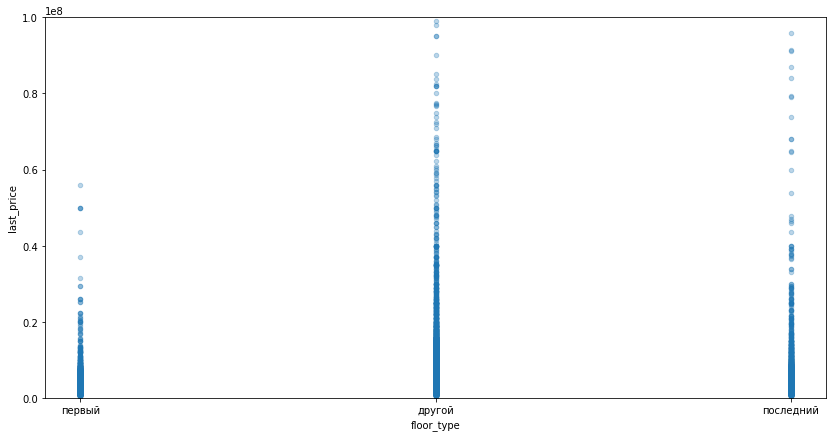

In [68]:
data.plot(x= 'floor_type', y='last_price', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.ylim(0, 100000000)

<AxesSubplot:xlabel='floor_type'>

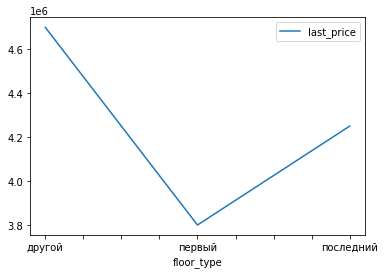

In [69]:
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot()

(0.0, 100000000.0)

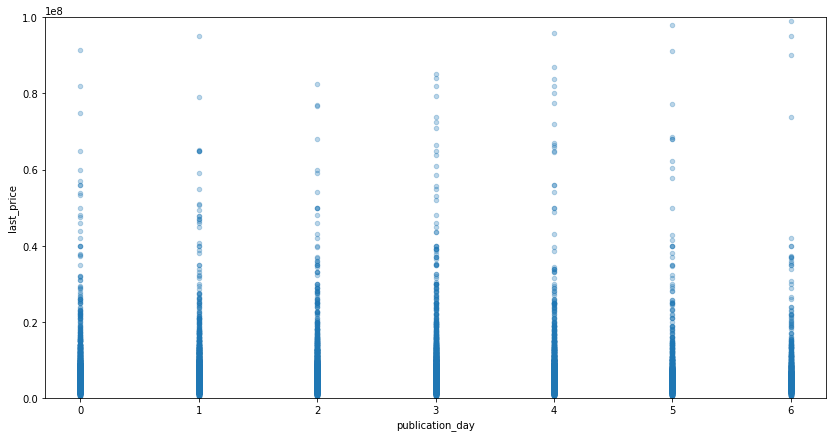

In [70]:
data.plot(x='publication_day', y='last_price', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.ylim(0, 100000000)

<AxesSubplot:xlabel='publication_day'>

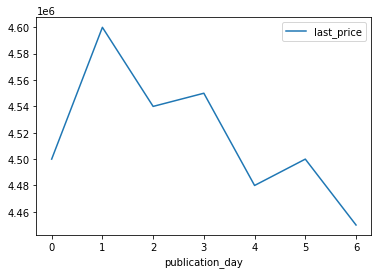

In [71]:
data.pivot_table(index = 'publication_day', values = 'last_price', aggfunc = 'median').plot()

0.004491396895632197

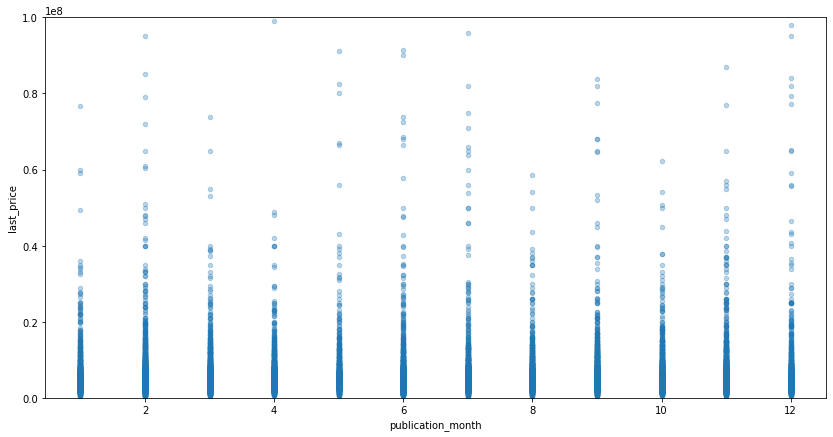

In [72]:
data.plot(x='publication_month', y='last_price', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.ylim(0, 100000000)
data['publication_month'].corr(data['last_price'])

<AxesSubplot:xlabel='publication_month'>

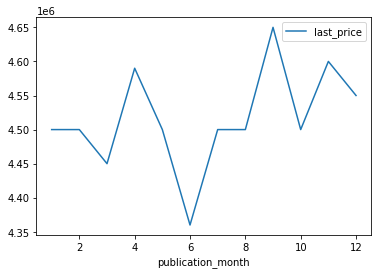

In [73]:
data.pivot_table(index = 'publication_month', values = 'last_price', aggfunc = 'median').plot()

-0.05594699276159482

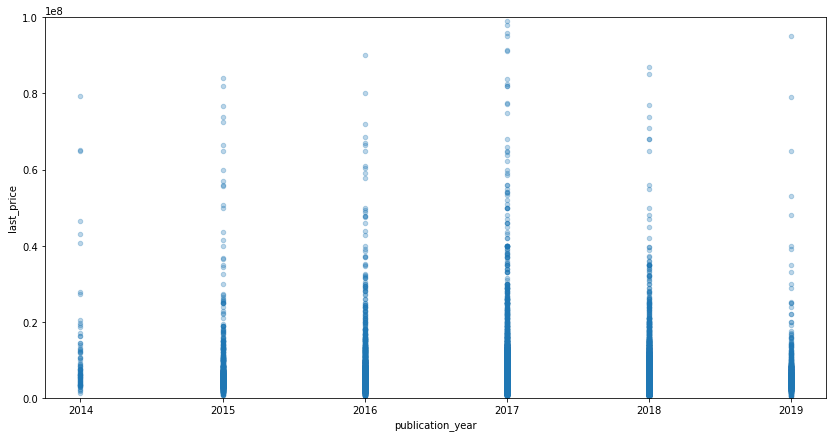

In [74]:
data.plot(x='publication_year', y='last_price', kind='scatter', alpha=0.3, figsize=(14, 7))
plt.ylim(0, 100000000)
data['publication_year'].corr(data['last_price'])

<AxesSubplot:xlabel='publication_year'>

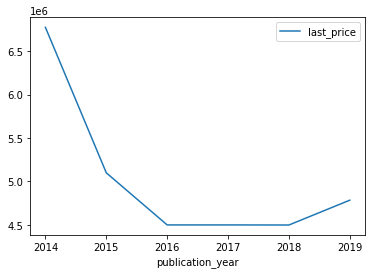

In [75]:
data.pivot_table(index = 'publication_year', values = 'last_price', aggfunc = 'median').plot()

In [76]:
data.pivot_table(index = 'publication_year', values = 'last_price', aggfunc = 'count')

,last_price
publication_year,
2014,86
2015,969
2016,2666
2017,7882
2018,7509
2019,1082


Таким образом,
 - общая площадь квартиры влияет на стоимость, с увеличением площади увеличивается и стоимость (коэффициент корреляции 0,64 - средняя корреляция)
 - жилая площадь - коэффициент корреляции 0,55 - средняя корреляции, есть зависимость между жилой площадью стоимостью квартиры, больше площадь - больше стоимость
 - площадь кухни - коэффициент корреляции 0,42 - маленькая корреляция, есть зависимость между площадью кухни и стоимостью но она мала
 - количество комнат - по графику с медианными стоимостями квартиры в зависимости от количества комнат, можно сделать вывод, что при увеличении количества комнат увеличивается стоимость
 - тип этажа, на котором расположена квартира (первый, последний, другой) - квартиры на первом этаже дешевле, чем на последнем, ещё дороже квартиры в группе 'другой'
 - дата размещения (день недели, месяц, год) - судя по графику медиан цены по дням недели, самые дорогие квартиры выставлют во вторник, по месяцам - апрель, сентябрь и ноябрь самые большие цены, а в июне самые маленькие, по годам - будем делать выводы по 2016,2017,2018 и 2019, так как по 2014 и 2015 мало данных, можно сделать вывод, что 2016,2017,2018 цена почти не менялась, а в 2019 стоимость квартиры выросла

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [77]:
data_locality = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc = ['count','mean'])
data_locality.columns = ['count', 'mean']
data_locality = data_locality.sort_values(by = 'count', ascending = False).head(10)
print(data_locality)
#населенный пункт с самой высокой стоимостью квадратного метра
print(data_locality[data_locality['count'] == data_locality['count'].max()])
#населенный пункт с самой низкой стоимостью квадратного метра
print(data_locality[data_locality['count'] == data_locality['count'].min()])

                   count           mean
locality_name                          
Санкт-Петербург    13434  112287.486729
поселок Мурино       544   85721.485155
поселок Шушары       406   77825.563140
Всеволожск           337   68593.794356
Колпино              307   74839.183084
Пушкин               303  102120.626091
поселок Парголово    301   89423.993853
деревня Кудрово      298   92454.342295
Гатчина              268   67928.326990
Выборг               206   57184.099136
                 count           mean
locality_name                        
Санкт-Петербург  13434  112287.486729
               count          mean
locality_name                     
Выборг           206  57184.099136


Таким образом, самая большая стоимость 1 квадратного метра в городе Санкт-Петербург, а самоая маленькая в городе Выборг.

Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра.

/tmp/ipykernel_250/1570575282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')


<AxesSubplot:xlabel='cityCenters_nearest_km'>

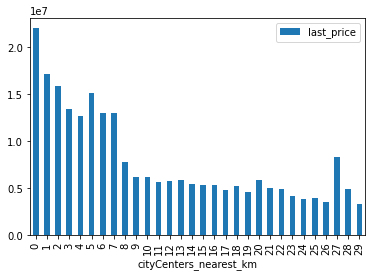

In [78]:
#избавимся от пропусков, чтобы можно было провести анализ
data = data[~data['cityCenters_nearest_km'].isna()]
#сменим тип данных столбца 'cityCenters_nearest_km' на 'int'
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
data[data['locality_name']=='Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc='mean').plot(kind='bar')

Можно сделать вывод, что самая дорогая недвижимость находится на уровне 0 км, далее стоимость постепенно уменьшается и на уровне 7, 8 км происходит резкий спад цены, далее уменьшение опять происходит постепенно и на уровне 27 км происходит резкий скачок, далее опять спад. К центру отнесём, всё что находится на уровне 7-8 км.

### Напишите общий вывод

**Общий вывод**

Были проведены следуюшие манипуляции с данными:
- обработка пропущенных значений там, где это необходимо
- заменены типы данных для удобной работы
- посчитаны и добавлены в таблицу цена квадратного метра жилья, дни недели, месяцы и года размещения объявлений, категории по этажам квартир
- изучены параметры на наличие выбивающихся значений - площадь, цена, расстояние до аэропорта, высота потолков, количество дней размещения объявления, были определены аномалии в данных параметрах
- выявлены при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 500 дней
- выявлено, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру и площадь, день, месяц, год размещения особо не влияют на стоимость квадратного метра
- стоимость за квадратный метр в городе Санкт - Петербург самая большая 112287.486729 - средний показатель
- стоимость за квадратный метр в городе Выборг самая маленькая 57184.099136 - средний показатель

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.